In [7]:
import tensorflow as tf
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import keras
from keras.preprocessing import image    
import os
import PIL.Image as Image

In [41]:
model = tf.keras.models.load_model('drink-detection.h5')

In [42]:
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=(0.9, 1.1),
    horizontal_flip=True,
    vertical_flip=True
)

test_dir = "./images/to_predict/"

IMG_HEIGHT, IMG_WIDTH = 224, 224
IMG_SIZE = [IMG_HEIGHT,IMG_WIDTH]

test_data_gen = test_image_generator.flow_from_directory(directory=test_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                        classes=["test"])


files = os.listdir(test_dir)

images = list(map((lambda f: Image.open(test_dir+f).resize(IMG_SIZE)),files))


Found 0 images belonging to 1 classes.


(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1
(1, 4)
Predicted_Class: 1


ValueError: Error when checking input: expected resnet50v2_input to have shape (224, 224, 3) but got array with shape (224, 224, 4)

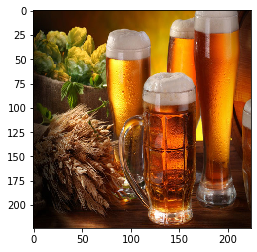

In [78]:
#for i in np.random.choice(x_test.shape[0], size=5):

plt.figure()
    
for img in images:    
    img_data = np.array(img)/255.0
    
    prediction = model.predict(img_data[np.newaxis,:])
    
    print(prediction.shape)
    
    predicted_class = np.argmax(prediction[0], axis=-1)
    print("Predicted_Class: %d" % predicted_class)
    
    plt.imshow(img_data)
    #plt.title("prediction: %d, actual: %d" % (max_class, y_test[i]))    
    